# Big Mart Sales Prediction

# Veeri Dheeraj
# 12012614
# K20KT

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm, boxcox
from scipy import stats
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm

In [2]:
# Importing Test_set
Test_set = pd.read_csv("C:/Users/veeri/OneDrive/Desktop/ML Project/Big Mart Sales/Test-Set.csv")

In [3]:
# Importing Train_set
Train_set = pd.read_csv("C:/Users/veeri/OneDrive/Desktop/ML Project/Big Mart Sales/Train-Set.csv")

# Testing Data 

In [4]:
# Studying the data and cleaning the data
Test_set.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
Test_set.shape

(5681, 11)

In [6]:
Test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          5681 non-null   object 
 1   Weight             4705 non-null   float64
 2   FatContent         5681 non-null   object 
 3   ProductVisibility  5681 non-null   float64
 4   ProductType        5681 non-null   object 
 5   MRP                5681 non-null   float64
 6   OutletID           5681 non-null   object 
 7   EstablishmentYear  5681 non-null   int64  
 8   OutletSize         4075 non-null   object 
 9   LocationType       5681 non-null   object 
 10  OutletType         5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
Test_set.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [8]:
Test_set.isnull().sum()

ProductID               0
Weight                976
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1606
LocationType            0
OutletType              0
dtype: int64

In [9]:
Test_set["Weight"].fillna(Test_set["Weight"].mean(),inplace = True)
Test_set.isnull().sum()

ProductID               0
Weight                  0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1606
LocationType            0
OutletType              0
dtype: int64

In [10]:
Test_set["OutletSize"].fillna(Test_set["OutletSize"].mode(),inplace = True)
Test_set.isnull().sum()

ProductID               0
Weight                  0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1606
LocationType            0
OutletType              0
dtype: int64

In [11]:
from scipy.stats import mode
mode_of_outlet_size = Test_set.pivot_table(values = 'OutletSize', index = 'OutletType',aggfunc=(lambda x : mode(x.dropna()).mode[0]))

In [12]:
print(mode_of_outlet_size)

                  OutletSize
OutletType                  
Grocery Store          Small
Supermarket Type1      Small
Supermarket Type2     Medium
Supermarket Type3     Medium


In [13]:
Test_set["FatContent"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: FatContent, dtype: int64

In [14]:
Test_set.replace({'FatContent': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
Test_set['FatContent'].value_counts()

Low Fat    3668
Regular    2013
Name: FatContent, dtype: int64

In [15]:
Test_set.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [17]:
Test_set["ProductID"]=encoder.fit_transform(Test_set["ProductID"])
Test_set["FatContent"]=encoder.fit_transform(Test_set["ProductID"])
Test_set["ProductType"]=encoder.fit_transform(Test_set["ProductType"])
Test_set["OutletID"]=encoder.fit_transform(Test_set["OutletID"])
Test_set["OutletSize"]=encoder.fit_transform(Test_set["OutletSize"])
Test_set["LocationType"]=encoder.fit_transform(Test_set["LocationType"])
Test_set["OutletType"]=encoder.fit_transform(Test_set["OutletType"])

In [18]:
Test_set.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,1103,20.750000,1103,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1067,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600000,1406,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315000,809,0.015388,13,155.0340,2,2007,3,1,1
4,1184,12.695633,1184,0.118599,4,234.2300,5,1985,1,2,3


# Training Data 

In [19]:
Train_set.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
Train_set.shape

(8523, 12)

In [21]:
Train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [22]:
Train_set.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [23]:
Train_set.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [24]:
Train_set["Weight"].fillna(Train_set["Weight"].mean(),inplace = True)

In [25]:
Train_set["OutletSize"].fillna(Train_set["OutletSize"].mode(),inplace = True)

In [26]:
Train_set.isnull().sum()

ProductID               0
Weight                  0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [27]:
Train_set["FatContent"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: FatContent, dtype: int64

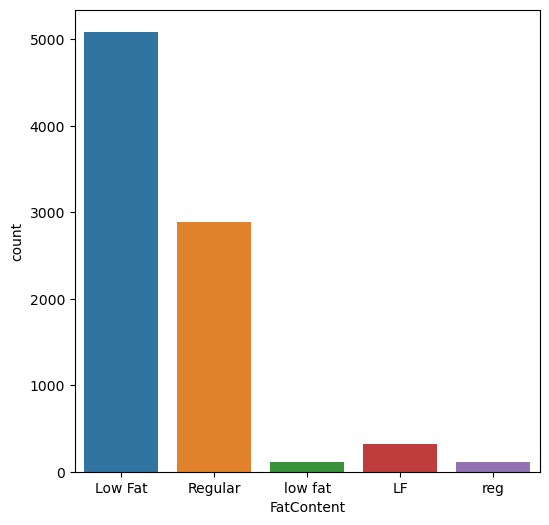

In [28]:
plt.figure(figsize = (6,6))
sns.countplot('FatContent',data = Train_set)
plt.show()

In [29]:
Train_set.replace({'FatContent': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
Train_set['FatContent'].value_counts()

Low Fat    5517
Regular    3006
Name: FatContent, dtype: int64

<AxesSubplot:ylabel='FatContent'>

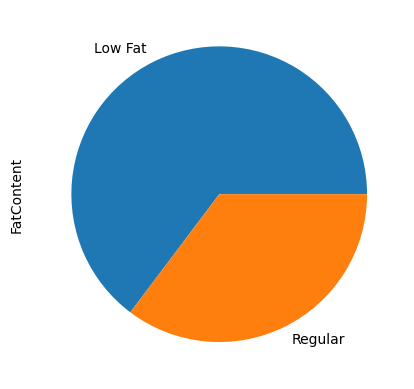

In [30]:
Train_set["FatContent"].value_counts().plot(kind='pie')

In [31]:
encoder=LabelEncoder()

In [32]:
Train_set["ProductID"]=encoder.fit_transform(Train_set["ProductID"])
Train_set["FatContent"]=encoder.fit_transform(Train_set["ProductID"])
Train_set["ProductType"]=encoder.fit_transform(Train_set["ProductType"])
Train_set["OutletID"]=encoder.fit_transform(Train_set["OutletID"])
Train_set["OutletSize"]=encoder.fit_transform(Train_set["OutletSize"])
Train_set["LocationType"]=encoder.fit_transform(Train_set["LocationType"])
Train_set["OutletType"]=encoder.fit_transform(Train_set["OutletType"])

In [33]:
Train_set.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.30,156,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,8,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,662,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1121,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,1297,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [34]:
y=Train_set["OutletSales"]
x=Train_set.drop(["OutletSales"],inplace=True,axis=1)

In [35]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: OutletSales, Length: 8523, dtype: float64

In [36]:
x

In [37]:
x=Train_set

# Predicting R-Square Value

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
y_train,y_test,x_train,x_test=train_test_split(y,x,test_size = 0.3,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(8523, 11) (5966, 11) (2557, 11)


In [40]:
import xgboost
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 750,learning_rate = 0.007)
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.007, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=750, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [41]:
train_prediction = model.predict(x_train)

In [42]:
from sklearn import metrics
r2_train = metrics.r2_score(y_train,train_prediction)
print("R Squared Value : ",r2_train)

R Squared Value :  0.6935136962191357


## By Using the above data cleaning and data prediction for train set and test set we found the R-Squared value.
## With R-Squared value we can define that it is a goodness-of-fit measure for linear regression models. And from this value we can see the best fit line for our linear regression model which is used for the prediction analysis.

# Visualization of Train_set

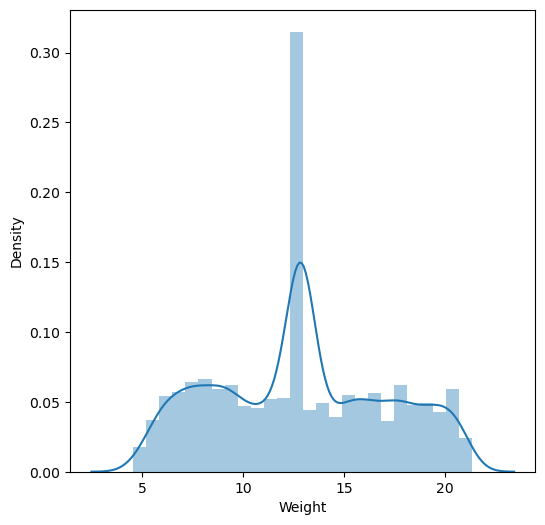

In [43]:
plt.figure(figsize = (6,6))
sns.distplot(Train_set['Weight'])
plt.show()

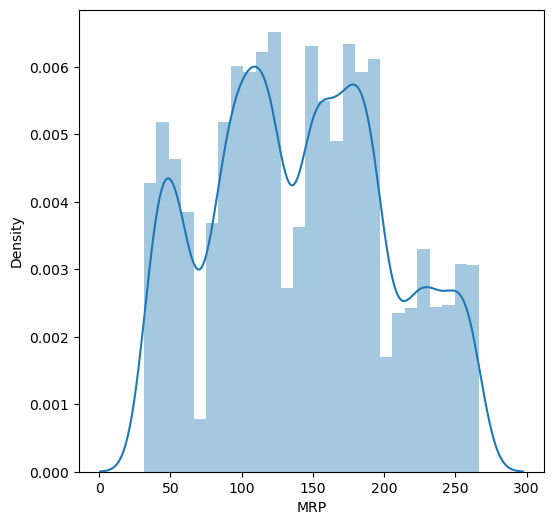

In [44]:
plt.figure(figsize = (6,6))
sns.distplot(Train_set['MRP'])
plt.show()

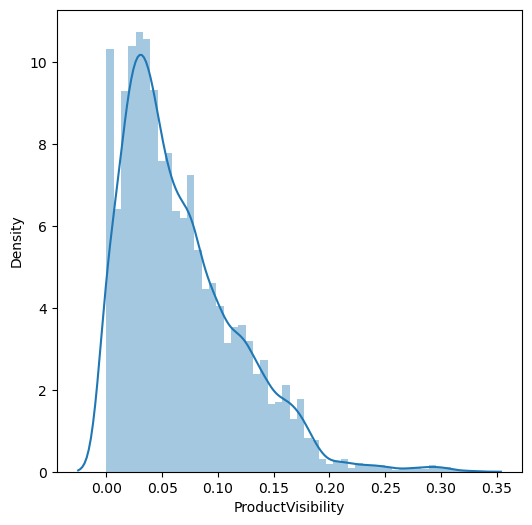

In [45]:
plt.figure(figsize = (6,6))
sns.distplot(Train_set['ProductVisibility'])
plt.show()

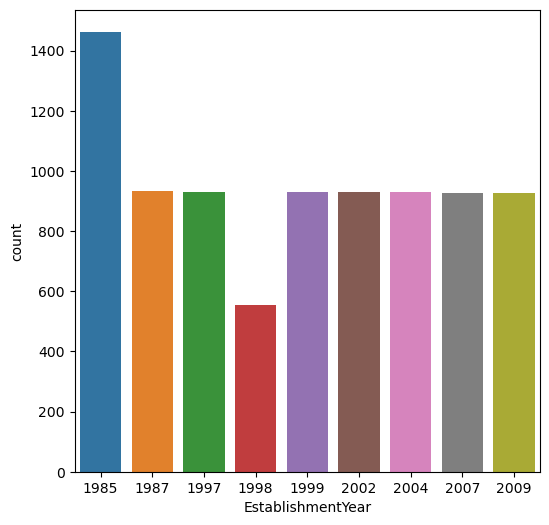

In [46]:
plt.figure(figsize = (6,6))
sns.countplot('EstablishmentYear',data = Train_set)
plt.show()

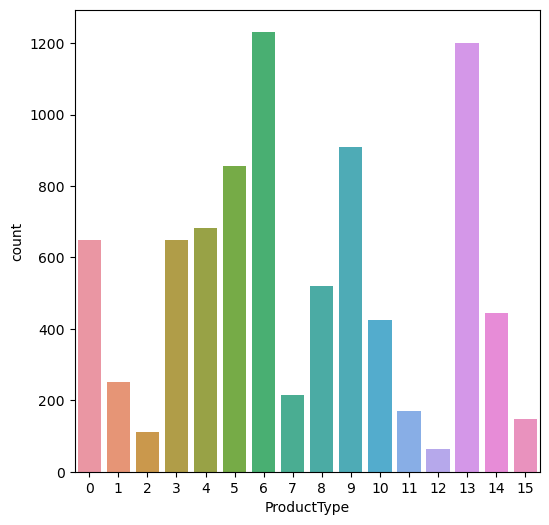

In [47]:
plt.figure(figsize = (6,6))
sns.countplot('ProductType',data = Train_set)
plt.show()

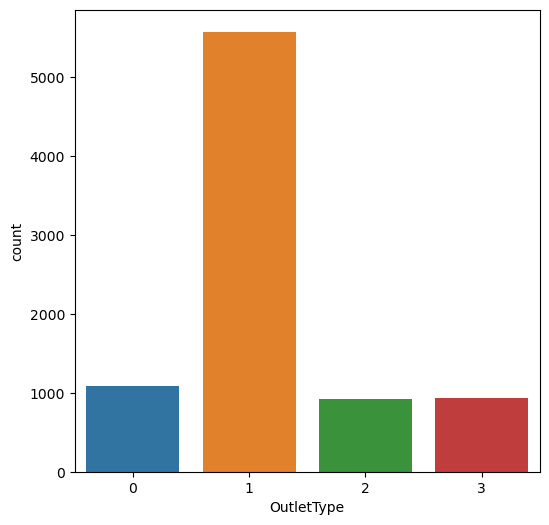

In [48]:
plt.figure(figsize = (6,6))
sns.countplot('OutletType',data = Train_set)
plt.show()

# Linear Regression of Test_set

In [49]:
Test_set

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,1103,20.750000,1103,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1067,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600000,1406,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315000,809,0.015388,13,155.0340,2,2007,3,1,1
4,1184,12.695633,1184,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,231,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,306,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,1412,0.073529,8,118.7440,7,2002,3,1,1
5679,517,15.300000,517,0.000000,3,214.6218,2,2007,3,1,1


In [50]:
a=Test_set["FatContent"]
b=Test_set["MRP"]

In [51]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, train_size = 0.7, test_size = 0.3, random_state = 100)

In [52]:
a_train.head()

1827    1105
1953     753
2937     842
3696    1304
1195     521
Name: FatContent, dtype: int64

In [53]:
b_train.head()

1827    176.0370
1953     52.4324
2937    183.2292
3696     50.2034
1195    124.2730
Name: MRP, dtype: float64

In [54]:
a_test.head()

888     330
1835    535
2201    692
3232    235
610     803
Name: FatContent, dtype: int64

In [55]:
b_test.head()

888     144.2812
1835    100.4700
2201    194.9452
3232    195.5794
610     158.1630
Name: MRP, dtype: float64

In [56]:
import statsmodels.api as sm

In [57]:
a_train_sm = sm.add_constant(a_train)
lr=sm.OLS(b_train,a_train_sm).fit()

In [58]:
lr.params

const         140.820338
FatContent     -0.000649
dtype: float64

In [59]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    MRP   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.08750
Date:                Wed, 26 Apr 2023   Prob (F-statistic):              0.767
Time:                        19:47:25   Log-Likelihood:                -22034.
No. Observations:                3976   AIC:                         4.407e+04
Df Residuals:                    3974   BIC:                         4.408e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        140.8203      1.963     71.748      0.0

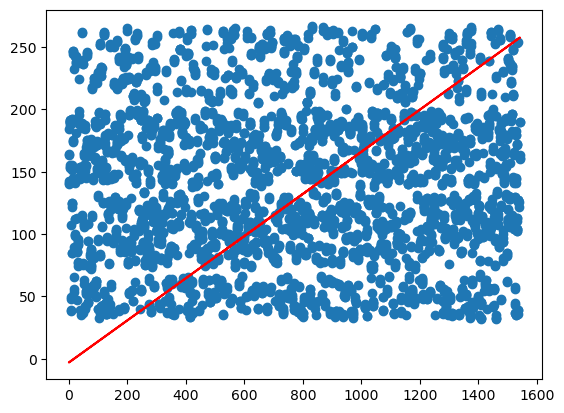

In [60]:
plt.scatter(a_train,b_train)
plt.plot(a_train,-2.987+0.169*a_train,'r')
plt.show()

In [61]:
Test_set

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,1103,20.750000,1103,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1067,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600000,1406,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315000,809,0.015388,13,155.0340,2,2007,3,1,1
4,1184,12.695633,1184,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,231,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,306,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,1412,0.073529,8,118.7440,7,2002,3,1,1
5679,517,15.300000,517,0.000000,3,214.6218,2,2007,3,1,1


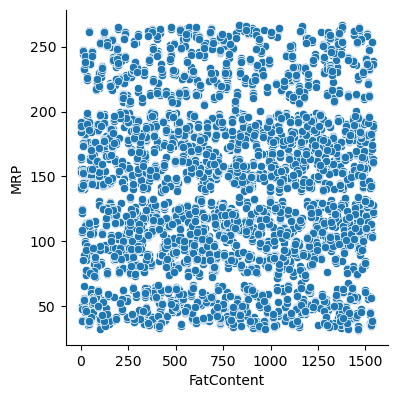

In [62]:
sns.pairplot(Test_set,x_vars=["FatContent"],y_vars=["MRP"],size=4,aspect=1,kind="scatter")
plt.show()

# For Train set

In [63]:
Train_set

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,156,9.300,156,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,8,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,662,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1121,0.000000,6,182.0950,0,1998,3,2,0
4,1297,8.930,1297,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,370,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,897,0.046982,0,108.1570,7,2002,3,1,1
8520,1357,10.600,1357,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,681,0.145221,13,103.1332,3,2009,1,2,2


In [64]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: OutletSales, Length: 8523, dtype: float64

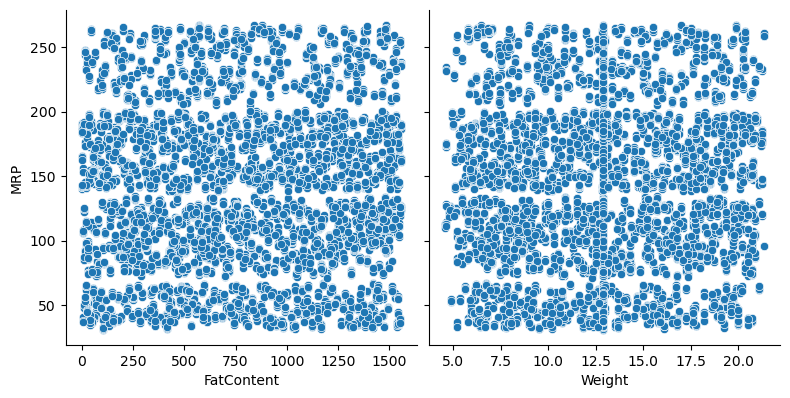

In [65]:
sns.pairplot(Train_set,x_vars=["FatContent","Weight"],y_vars=["MRP"],size=4,aspect=1,kind="scatter")
plt.show()

In [3]:
Train_set1 = pd.read_csv("C:/Users/veeri/OneDrive/Desktop/ML Project/Big Mart Sales/Train-Set.csv")

In [4]:
Train_set1

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


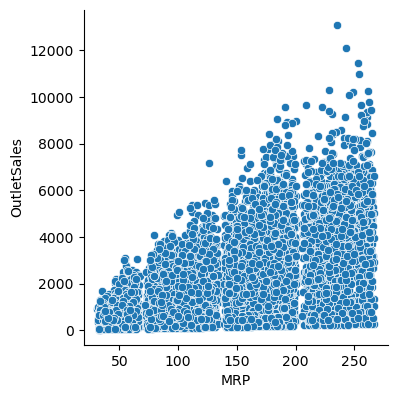

In [5]:
sns.pairplot(Train_set1,x_vars=["MRP"],y_vars=["OutletSales"],size=4,aspect=1,kind="scatter")
plt.show()

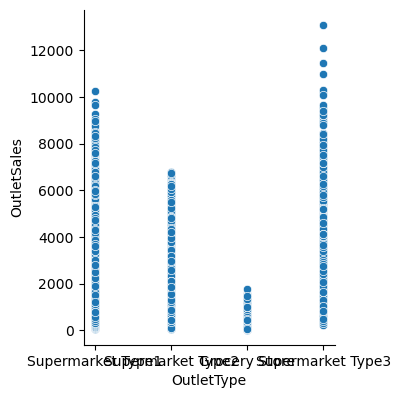

In [6]:
sns.pairplot(Train_set1,x_vars=["OutletType"],y_vars=["OutletSales"],size=4,aspect=1,kind="scatter")
plt.show()

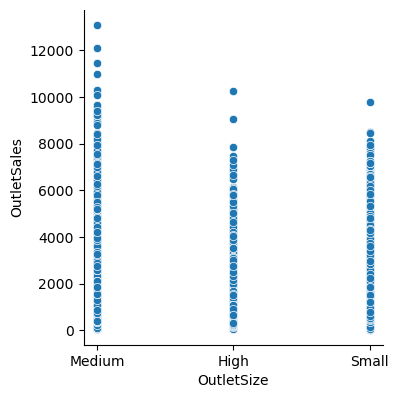

In [7]:
sns.pairplot(Train_set1,x_vars=["OutletSize"],y_vars=["OutletSales"],size=4,aspect=1,kind="scatter")
plt.show()

<AxesSubplot:>

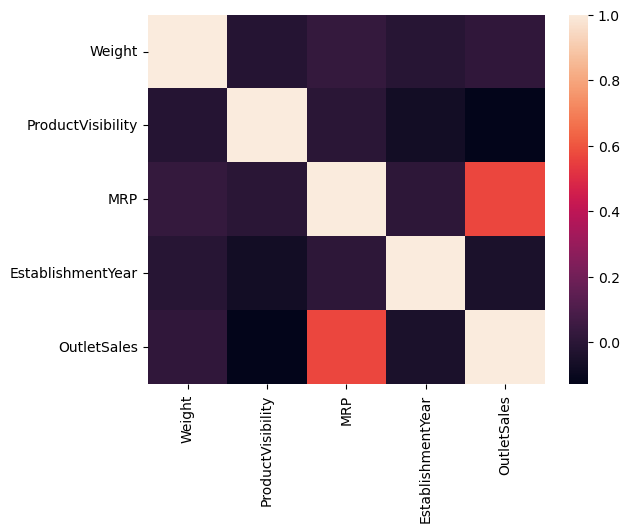

In [12]:
T_S = Train_set1.corr()
sns.heatmap(T_S)

## From the above Statistical Analysis, Virtualization, Linear Regression Model we can conclude that our data is normally distributed.
## And the null hypothesis is accepted.
## We can also conclude that the outlet sales for the train data depends upon the Location, Outlet Type, Fat Content and MRP price of the product
## We can clearly see that sales are high for the products whic has low fat content.
## And outlet sales does not depends upon the outlet size but it will depend upon the outlet type.
## The supermart with medium size has more sales.
## The supermart with small size has more size than big outlet size.
## From the Linear Regression graph we can clearly see that the MRP increases in the future when there is increase in products which has low Fat Content.
## Due to increase in MRP the Outlet Sales will be automatically increased.